# Imports

In [135]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import itertools
import datetime


# Data Preparation

In [136]:
df = pd.read_json('export.log', lines = True)

df = (pd.DataFrame(df['jsonPayload'].values.tolist())
        .add_prefix('jsonPayload.')
        .join(df.drop('jsonPayload', 1)))
df = (pd.DataFrame(df['jsonPayload.connection'].values.tolist())
        .add_prefix('jsonPayload.connection.')
        .join(df.drop('jsonPayload.connection', 1)))
df = df.dropna(subset=['jsonPayload.rtt_msec'])
df = df.astype({
    'jsonPayload.bytes_sent': 'int32',
    'jsonPayload.rtt_msec': 'int32'
    })
# df = df.astype({'jsonPayload.connection.src_port': 'int32'})
# df = df.astype({'jsonPayload.connection.dest_port': 'int32'})
df[["jsonPayload.connection.src_ip", "jsonPayload.connection.dest_ip", "jsonPayload.bytes_sent", "jsonPayload.rtt_msec", "timestamp"]].head()
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2021-07-07 10:50:08.851796+00:00 to 2021-07-07 12:21:59.422330+00:00
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   jsonPayload.connection.src_ip     101 non-null    object
 1   jsonPayload.connection.protocol   101 non-null    int64 
 2   jsonPayload.connection.dest_ip    101 non-null    object
 3   jsonPayload.connection.dest_port  101 non-null    int64 
 4   jsonPayload.connection.src_port   101 non-null    int64 
 5   jsonPayload.dest_vpc              101 non-null    object
 6   jsonPayload.reporter              101 non-null    object
 7   jsonPayload.dest_instance         101 non-null    object
 8   jsonPayload.end_time              101 non-null    object
 9   jsonPayload.src_location          36 non-null     object
 10  jsonPayload.packets_sent          101 non-null    object
 11  jsonPayload.start_tim

In [137]:
fromClient = df[df['jsonPayload.connection.src_ip']=='10.2.0.2']
toServer = df[df['jsonPayload.connection.dest_ip']=='10.2.0.3']

nodes = ["10.2.0.10", "10.2.0.11", "10.2.0.12"]
fromClientDataset = {}
toServerDataset = {}
betweenNodesDataset = {}
for node in nodes: 
    fromClientDataset[node] = fromClient[fromClient['jsonPayload.connection.dest_ip']==node]

nodeCombinations = list(itertools.product(*[nodes,nodes]))
for combination in nodeCombinations: 
    fromNode = df[df['jsonPayload.connection.src_ip']==combination[0]]
    # fromAnyNode = df[df["jsonPayload.connection.src_ip"].isin(nodes)]
    betweenNodesDataset["between " + combination[0] + " and " + combination[1]] = fromNode[fromNode['jsonPayload.connection.dest_ip']==combination[1]]

for node in nodes: 
    toServerDataset[node] = toServer[toServer['jsonPayload.connection.src_ip']==node]



# nodeCombinations
# fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.connection.dest_port']==8080]
# fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.bytes_sent']!=0]
# toServer.head()
toServerDataset["10.2.0.12"].head()
# betweenNodesDataset['to' + nodes[0]].info()
# fromClientTo4['jsonPayload.connection.protocol'].value_counts()
# fromClientTo4['jsonPayload.bytes_sent'].value_counts()
# fromClientTo4.info()

,jsonPayload.connection.src_ip,jsonPayload.connection.protocol,jsonPayload.connection.dest_ip,jsonPayload.connection.dest_port,jsonPayload.connection.src_port,jsonPayload.dest_vpc,jsonPayload.reporter,jsonPayload.dest_instance,jsonPayload.end_time,jsonPayload.src_location,...,jsonPayload.start_time,jsonPayload.bytes_sent,jsonPayload.src_vpc,jsonPayload.src_instance,jsonPayload.rtt_msec,jsonPayload.dest_location,logName,resource,receiveTimestamp,insertId
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-07 10:50:14.499803+00:00,10.2.0.12,6,10.2.0.3,27017,42870,"{'vpc_name': 'syncmesh-network', 'project_id':...",DEST,"{'region': 'us-central1', 'project_id': 'dspj-...",2021-07-07T10:50:10.976853356Z,NaN,...,2021-07-07T10:50:10.629726017Z,1625,"{'subnetwork_name': 'syncmesh-subnetwork', 'pr...","{'region': 'us-central1', 'vm_name': 'syncmesh...",0,NaN,projects/dspj-315716/logs/compute.googleapis.c...,"{'type': 'gce_subnetwork', 'labels': {'subnetw...",2021-07-07 10:50:14.499803 UTC,1vzqxl2g32q7b82
2021-07-07 10:50:14.499803+00:00,10.2.0.12,6,10.2.0.3,27017,42874,"{'vpc_name': 'syncmesh-network', 'project_id':...",DEST,"{'region': 'us-central1', 'project_id': 'dspj-...",2021-07-07T10:50:10.978153534Z,NaN,...,2021-07-07T10:50:10.632257705Z,2845363,"{'subnetwork_name': 'syncmesh-subnetwork', 'pr...","{'region': 'us-central1', 'vm_name': 'syncmesh...",13,NaN,projects/dspj-315716/logs/compute.googleapis.c...,"{'type': 'gce_subnetwork', 'labels': {'subnetw...",2021-07-07 10:50:14.499803 UTC,1vzqxl2g32q7b7y


# Results

## General

Text(0.5, 1.0, 'Round Trip Time Histogram')

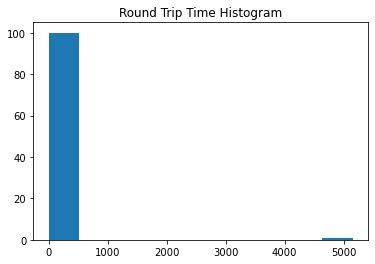

In [138]:
fig, ax = plt.subplots()
ax.hist(df['jsonPayload.rtt_msec'])
ax.set_title("Round Trip Time Histogram")

## Case: Baseline (Central Mongo)

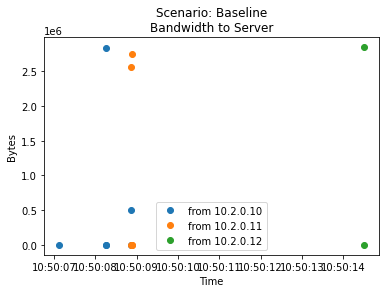

In [139]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in toServerDataset: 
    ax.plot(toServerDataset[key].index, toServerDataset[key]["jsonPayload.bytes_sent"], label="from " + key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Scenario: Baseline\nBandwidth to Server')
ax.set_ylabel("Bytes")
ax.set_xlabel("Time")
ax.legend()
fig.savefig("out/bandwidth_to_server.png")

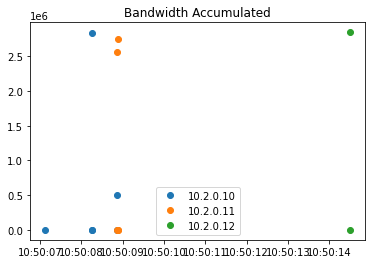

In [140]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in toServerDataset: 
    ax.plot(toServerDataset[key].index, toServerDataset[key]["jsonPayload.bytes_sent"], label=key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Bandwidth Accumulated')
ax.legend()

## Case: Syncmesh

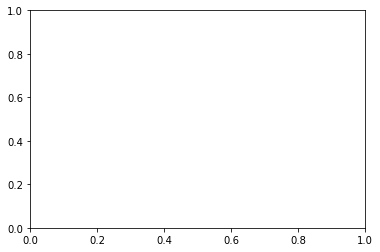

In [142]:
fig, ax = plt.subplots()
# plot histogram
binwidth = 10

# ax.hist(fromClientTo4['jsonPayload.bytes_sent'], bins=range(min(fromClientTo4['jsonPayload.bytes_sent']), max(fromClientTo4['jsonPayload.bytes_sent']) + binwidth, binwidth))
# ax.set_title("Package Size Histogram for Client to 4")

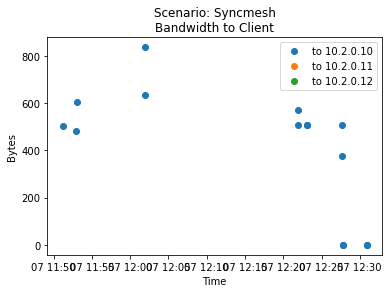

In [145]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in fromClientDataset: 
    ax.plot(fromClientDataset[key].index, fromClientDataset[key]["jsonPayload.bytes_sent"], label="to " + key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Scenario: Syncmesh\nBandwidth to Client')
ax.set_ylabel("Bytes")
ax.set_xlabel("Time")
ax.legend()
fig.savefig("out/bandwidth_from_client.png")

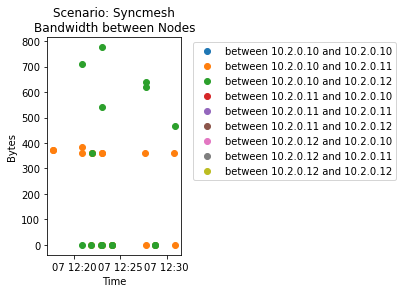

In [150]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in betweenNodesDataset: 
    ax.plot(betweenNodesDataset[key].index, betweenNodesDataset[key]["jsonPayload.bytes_sent"], label=key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Scenario: Syncmesh\nBandwidth between Nodes')
ax.set_ylabel("Bytes")
ax.set_xlabel("Time")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.4, box.height])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.savefig("out/bandwidth_between_nodes.png")

# Comparison

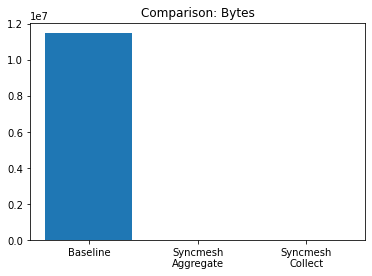

In [151]:
timedfbaseline = df.loc['2021-7-7 10:30':'2021-7-7 10:50']

baselineAggregateBytes = timedfbaseline["jsonPayload.bytes_sent"].sum()
baselineAggregateRTT = timedfbaseline["jsonPayload.rtt_msec"].sum()

timedfaggregate = df.loc['2021-7-7 12:29':'2021-7-7 12:31']

syncmeshAggregateBytes = timedfaggregate["jsonPayload.bytes_sent"].sum()
syncmeshAggregateRTT = timedfaggregate["jsonPayload.rtt_msec"].sum()

timedfcollect = df.loc['2021-7-7 12:26':'2021-7-7 12:28']

syncmeshCollectBytes = timedfcollect["jsonPayload.bytes_sent"].sum()
syncmeshCollectRTT = timedfcollect["jsonPayload.rtt_msec"].sum()

# timedfbaseline.info()

fig, ax = plt.subplots()
cases = ['Baseline', 'Syncmesh\nAggregate', 'Syncmesh\nCollect']
values = [baselineAggregateBytes, syncmeshAggregateBytes, syncmeshCollectBytes]
ax.bar(cases,values)
ax.set_title('Comparison: Bytes')
# ax.set_ylabel("Bytes")
# ax.set_xlabel("Time")
fig.savefig("out/comparison.png")
plt.show()

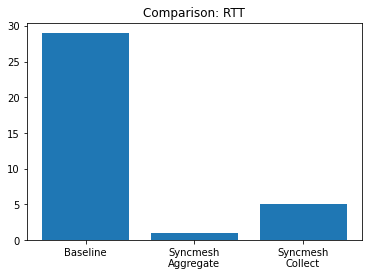

In [152]:
fig, ax = plt.subplots()
cases = ['Baseline', 'Syncmesh\nAggregate', 'Syncmesh\nCollect']
values = [baselineAggregateRTT, syncmeshAggregateRTT, syncmeshCollectRTT]
ax.bar(cases,values)
ax.set_title('Comparison: RTT')
# ax.set_ylabel("Bytes")
# ax.set_xlabel("Time")
fig.savefig("out/comparison_rtt.png")
plt.show()